In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
print(os.listdir('./data'))

['.ipynb_checkpoints', 'ARP_spoofing_ISCX.csv', 'body.csv', 'broadcast.csv', 'enrolment_2.csv', 'exam.csv', 'gdp.csv', 'iphone.csv', 'laptops.csv', 'liverpool.csv', 'silicon_valley_details.csv', 'silicon_valley_summary.csv', 'sports.csv', 'starbucks_drinks.csv', 'world_cities.csv', 'world_indexes.csv', '강의실 배정.ipynb']


In [16]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [17]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [18]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [20]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Dataset-Unicauca-Version2-87Atts.csv has 3577296 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./data/ARP_spoofing_ISCX.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = './data/ARP_spoofing_ISCX.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 909 rows and 84 columns


In [21]:
df1.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,175.207.12.40-192.168.0.53-80-56861-6,192.168.0.53,56861,175.207.12.40,80,6,20/07/2021 05:24:08,1527259,6,9,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
1,175.207.12.40-192.168.0.53-80-56861-6,192.168.0.53,56861,175.207.12.40,80,6,20/07/2021 05:24:09,274,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
2,192.168.0.53-117.18.232.200-50350-443-6,117.18.232.200,443,192.168.0.53,50350,6,20/07/2021 05:24:11,140,3,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
3,192.168.0.53-40.126.35.151-50370-443-6,192.168.0.53,50370,40.126.35.151,443,6,20/07/2021 05:24:12,65210,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
4,192.168.0.53-104.16.19.94-59382-443-6,192.168.0.53,59382,104.16.19.94,443,6,20/07/2021 05:24:14,4108,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label


<ipython-input-16-3b4655b06a89>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nHistRow, nHistogramPerRow, i+1)


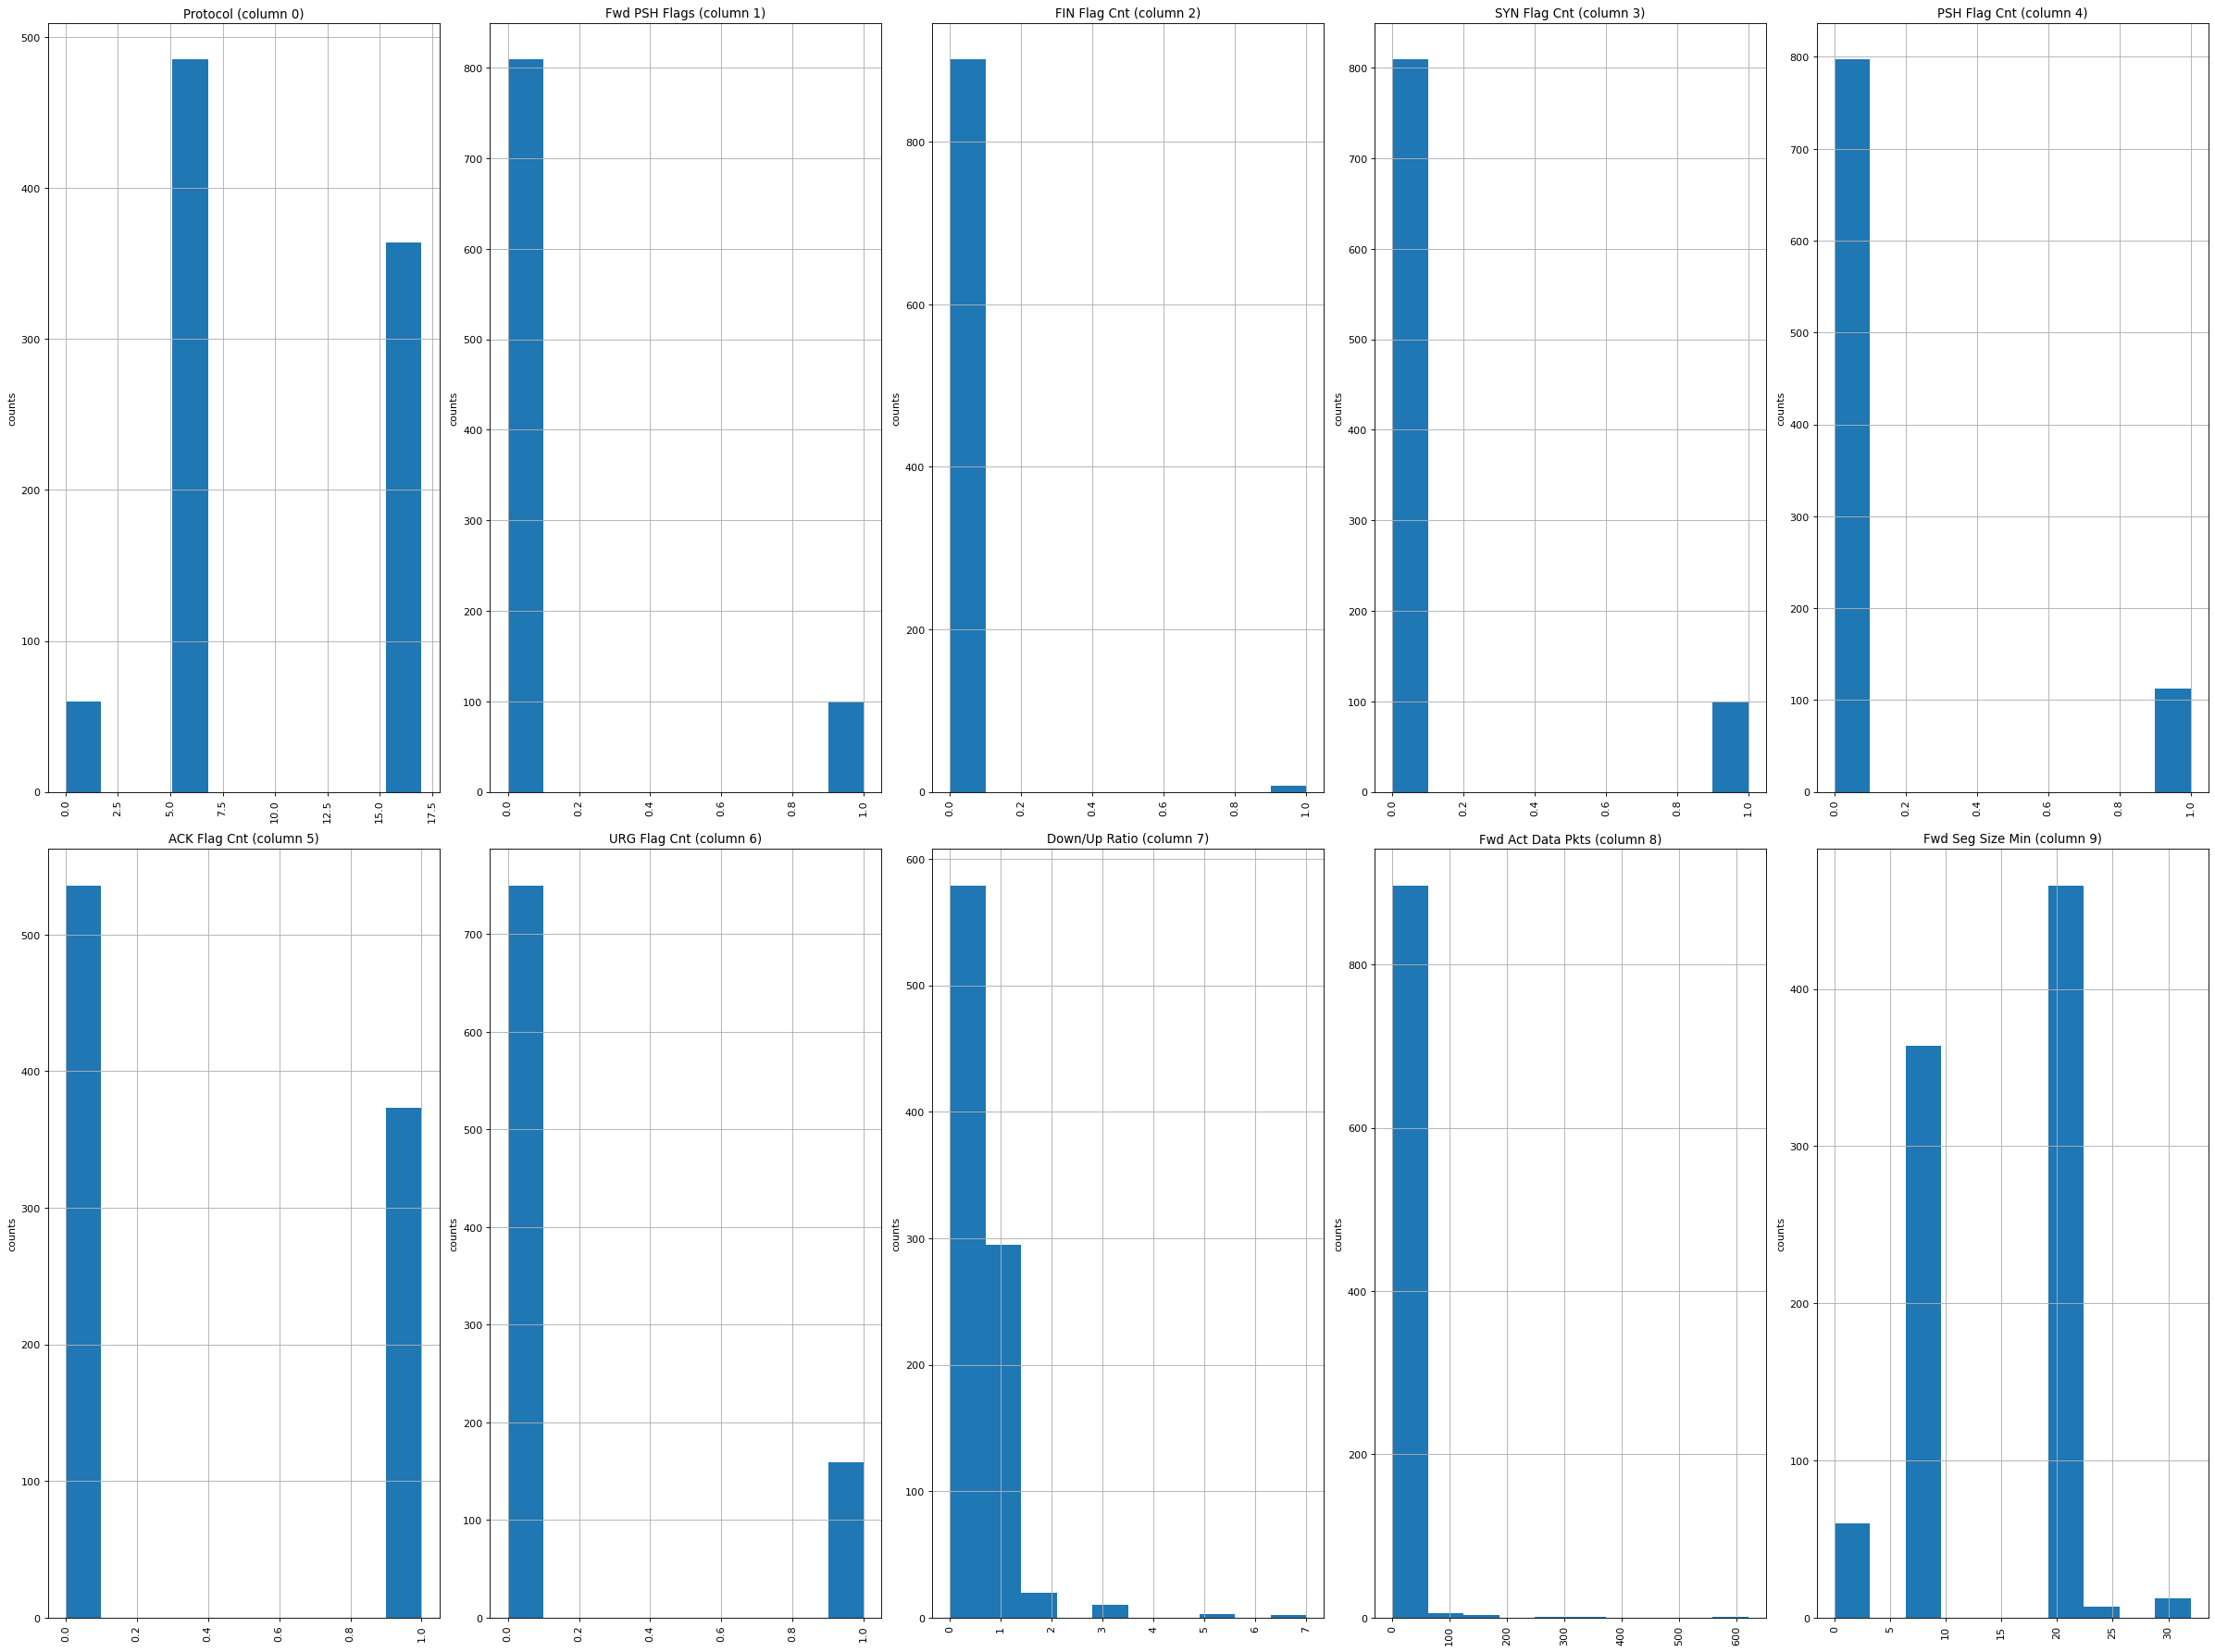

In [24]:
plotHistogram(df1, 10, 5)